# EXPLORATORY DATA ANALYSIS

## Import data and Process data

In [1]:
# Import the packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preview

In [4]:
#read dataset into dataframe
df = pd.read_csv('heartdisease dataset.csv')

In [6]:
#check size of the data
df.shape

(303, 14)

In [8]:
#check overall information : data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Feature Description
| Feature      | Description                                    | Value Meaning                                                                                         |
| ------------ | ---------------------------------------------- | ----------------------------------------------------------------------------------------------------- |
| **age**      | Age of the patient                             | Continuous value (in years)                                                                           |
| **sex**      | Gender of patient                              | **1** = Male<br>**0** = Female                                                                        |
| **cp**       | Chest pain type                                | **0** = Typical angina<br>**1** = Atypical angina<br>**2** = Non-anginal pain<br>**3** = Asymptomatic |
| **trestbps** | Resting blood pressure                         | Measured in mm Hg at hospital admission                                                               |
| **chol**     | Serum cholesterol                              | Measured in mg/dl                                                                                     |
| **fbs**      | Fasting blood sugar                            | **1** = Fasting blood sugar > 120 mg/dl<br>**0** = ≤ 120 mg/dl                                        |
| **restecg**  | Resting electrocardiographic results           | **0** = Normal<br>**1** = ST-T wave abnormality<br>**2** = Left ventricular hypertrophy               |
| **thalach**  | Maximum heart rate achieved                    | Continuous numeric value                                                                              |
| **exang**    | Exercise-induced angina                        | **1** = Yes<br>**0** = No                                                                             |
| **oldpeak**  | ST depression induced by exercise              | Numeric value indicating depression level                                                             |
| **slope**    | Slope of peak exercise ST segment              | **0** = Upsloping<br>**1** = Flat<br>**2** = Downsloping                                              |
| **ca**       | Number of major vessels colored by fluoroscopy | **0** = No vessels<br>**1** = One vessel<br>**2** = Two vessels<br>**3** = Three vessels              |
| **thal**     | Thalassemia condition                          | **0** = Normal<br>**1** = Fixed defect<br>**2** = Reversible defect                                   |
| **target**   | Presence of heart disease                      | **1** = Heart disease present<br>**0** = No heart disease                                             |


In [11]:
# recheck the object data type 
for i in df.columns:
    if df[i].dtype==object:
        d= df[i].value_counts()
        print(pd.DataFrame(df=d))
"""There are no null values in the dataset"""

'There are no null values in the dataset'

In [13]:
# Check the numerical data values 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Target Distribution
#### Dataset is almost balanced, No need for SMOTE

Text(0.5, 1.0, 'Heart Disease Distribution')

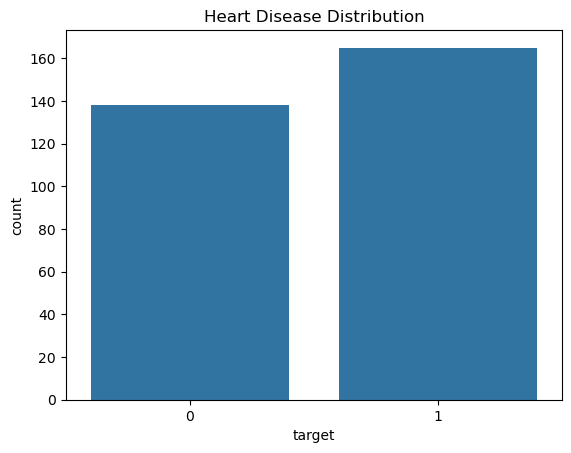

In [16]:
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")

# Univariate Analysis
#### Most patients in the dataset are between 45 and 65 years, which is the age range where heart disease risk usually increases

Text(0.5, 1.0, 'Age Distribution')

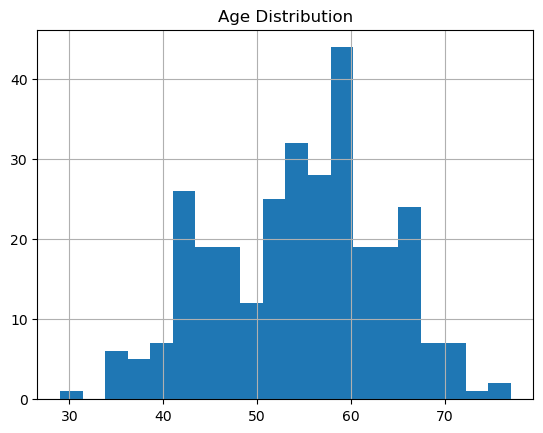

In [26]:
df['age'].hist(bins=20)
plt.title("Age Distribution")

# Bivariate Analysis
#### Patients with lower maximum heart rate are more likely to have heart disease

<Axes: xlabel='target', ylabel='thalach'>

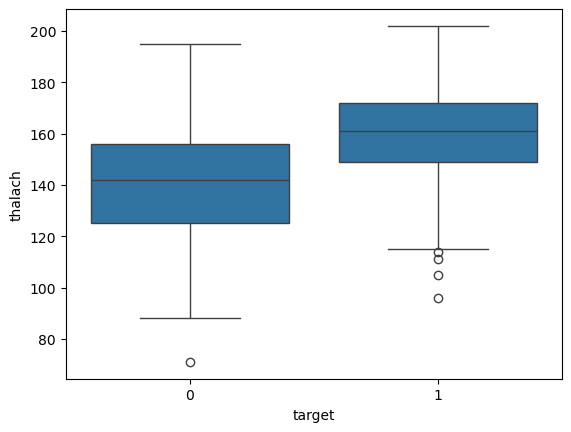

In [29]:
sns.boxplot(x='target', y='thalach', data=df)

# Correlation Analysis
#### Heart disease is influenced by multiple related features, not a single variable, which makes machine learning suitable for prediction.

<Axes: >

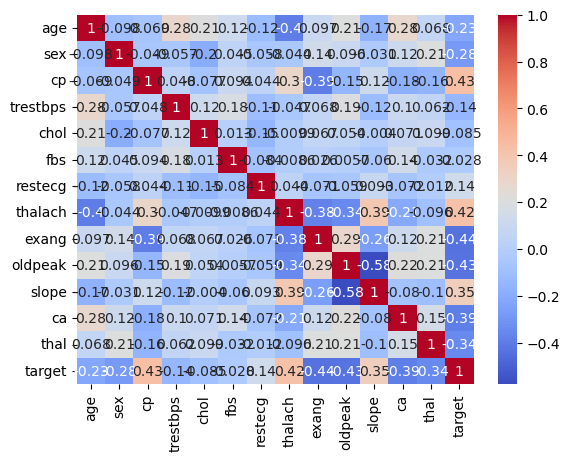

In [33]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

# Feature Engineering

In [36]:
df['age_group'] = pd.cut(df['age'], bins=[29,45,60,80], labels=[0,1,2])

# Attribute Plotting

## Heart Attack Rate Count 
#### The bar chart shows the distribution of the target variable, indicating that the dataset contains both heart disease and non-heart disease cases. The classes are reasonably balanced, making the dataset suitable for further analysis and model building.

<Axes: title={'center': 'HeartAttack_count'}, xlabel='target'>

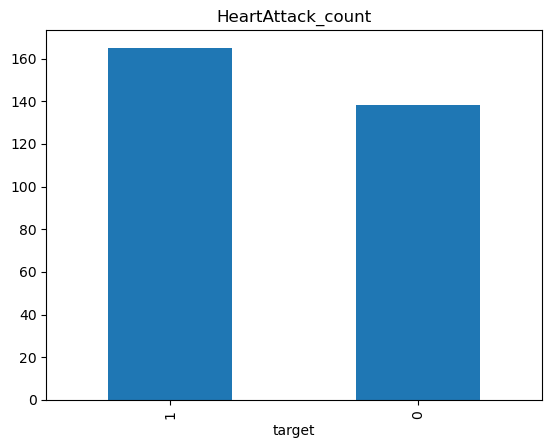

In [20]:
target_count=df['target'].value_counts()
target_count.plot(kind='bar', title='HeartAttack_count')

## Age and Sex Count
#### Age Distribution: The dataset contains patients across a wide age range, with most individuals falling in the middle-aged to older age groups, which aligns with typical heart disease risk patterns.
#### Gender Distribution: The dataset has a higher number of male patients compared to female patients, indicating that heart disease cases are more prevalent among males in this dataset.

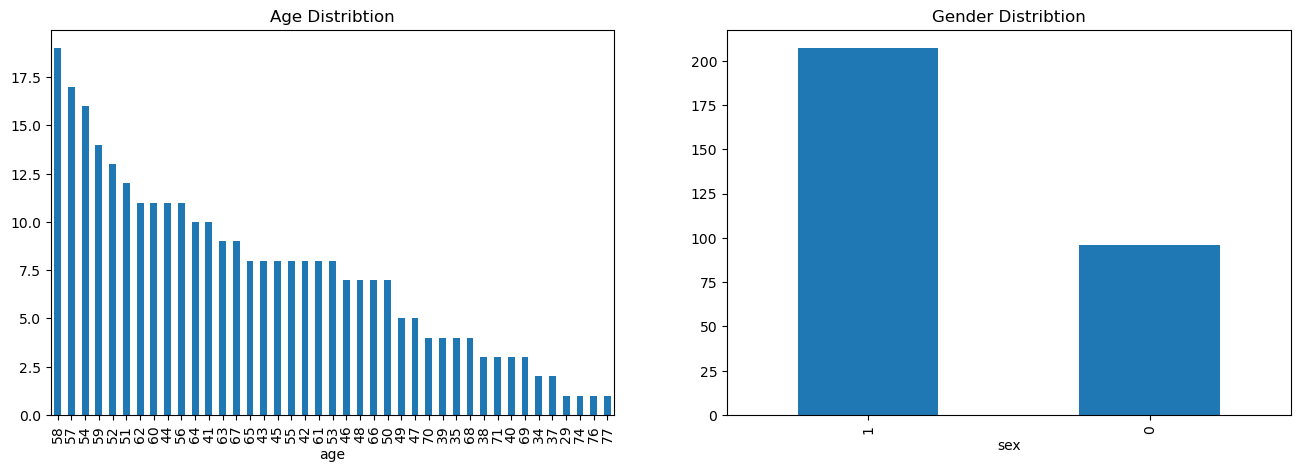

In [38]:
age_count=df["age"].value_counts()
gender_count=df["sex"].value_counts() 
fig,(ax1, ax2)= plt.subplots(1,2,figsize=(16,5))
_ = age_count.plot(kind='bar',title='Age Distribtion',ax=ax1)
_ = gender_count.plot(kind='bar',title='Gender Distribtion',ax=ax2)

# Chest Pain and Heart Attack

#### Chest pain type cp = 2 is the most common among patients, while cp = 3 is rare. Interestingly, cp = 0 has the highest number of patients without heart disease, suggesting that some chest pain types are less associated with heart disease than others.

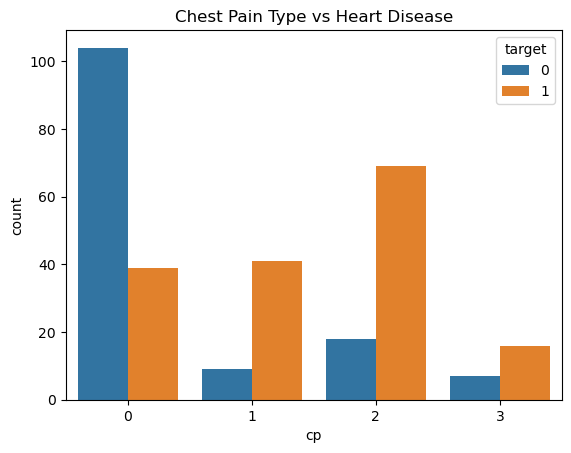

In [41]:
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Heart Disease')
plt.show()

# Oldpeak and Heart Attack

#### Higher Oldpeak values are more common in people without heart disease (Target 0), whereas those with heart disease (Target 1) usually have very low scores near zero. This makes Oldpeak a strong "red flag" feature for separating the two groups.

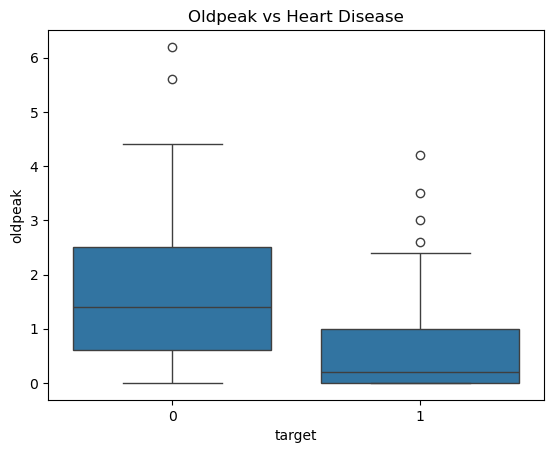

In [44]:
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title('Oldpeak vs Heart Disease')
plt.show()

# Cholestrol and Age
#### As people get older, their cholesterol levels show a slight upward trend, with most people in their 50s and 60s having levels between 200 and 300 mg/dL. While there is one extreme outlier above 500 mg/dL, age alone doesn't strictly determine cholesterol, as the data points are very spread out

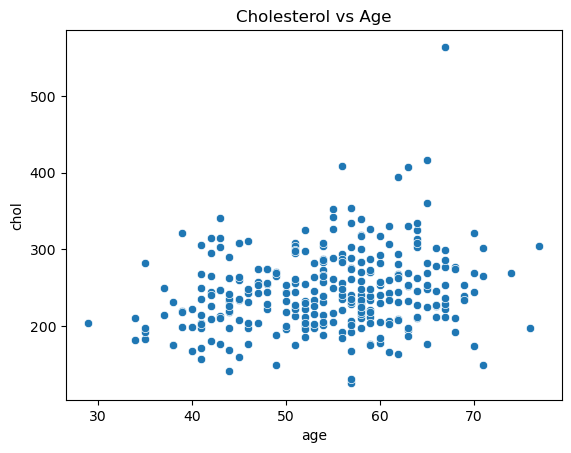

In [47]:
sns.scatterplot(x='age', y='chol', data=df)
plt.title('Cholesterol vs Age')
plt.show()

# Cholestrol and Target
#### As people get older, their cholesterol levels show a slight upward trend, with most people in their 50s and 60s having levels between 200 and 300 mg/dL. While there is one extreme outlier above 500 mg/dL .

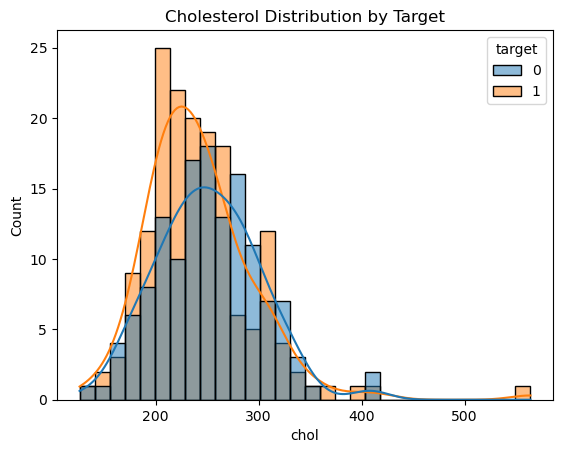

In [50]:
sns.histplot(data=df, x='chol', hue='target', kde=True, bins=30)
plt.title('Cholesterol Distribution by Target')
plt.show()